In [103]:
from tensorflow import keras
from keras import Sequential, layers, datasets, preprocessing, regularizers
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=10000)
# (x_train, y_train), (x_test, y_test) = datasets.imdb.load_data(num_words=88584)

print(x_train.shape)
print(x_test.shape)

# restore np.load for future normal usage
np.load = np_load_old
del(np_load_old)


word_index = keras.datasets.imdb.get_word_index()

print('preprocessing...')
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=256)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=256)

x_val = x_train[:10000]
y_val = y_train[:10000]

x_train = x_train[10000:]
y_train = y_train[10000:]

print(x_train.shape)

(25000,)
(25000,)
preprocessing...
(15000, 256)


In [104]:
print('build model')
model = Sequential()
# model.add(layers.Embedding(10000, 64))
model.add(layers.Embedding(88584, 16))
model.add(layers.Dropout(0.5))
model.add(layers.LSTM(100))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

print('train model')
history = model.fit(x_train,
              y_train,
              epochs=5,
              batch_size=512,
              validation_data=(x_val, y_val),
              verbose=1)

build model
train model
Train on 15000 samples, validate on 10000 samples
Epoch 1/5
15000/15000 [==============================] - 169s 11ms/step - loss: 0.7146 - acc: 0.5236 - val_loss: 0.7073 - val_acc: 0.5677
Epoch 2/5
15000/15000 [==============================] - 175s 12ms/step - loss: 0.6945 - acc: 0.6220 - val_loss: 0.6780 - val_acc: 0.7166
Epoch 3/5
15000/15000 [==============================] - 177s 12ms/step - loss: 0.6446 - acc: 0.6998 - val_loss: 0.5751 - val_acc: 0.7206
Epoch 4/5
15000/15000 [==============================] - 193s 13ms/step - loss: 0.5004 - acc: 0.8051 - val_loss: 0.4090 - val_acc: 0.8274
Epoch 5/5
15000/15000 [==============================] - 283s 19ms/step - loss: 0.4066 - acc: 0.8493 - val_loss: 0.3681 - val_acc: 0.8528


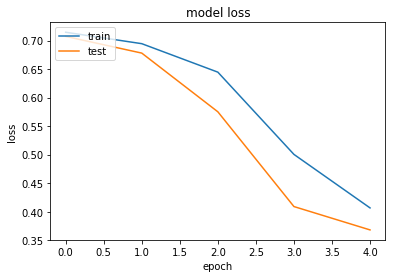

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [106]:
# sample = 'this place is terrible'
sample = "I love this moment"
sample_label = 1
# convert input sentence to tokens based on word_index
inps = [word_index[word] for word in sample.split() if word in word_index]
# the sentence length should be the same as the input sentences
inps = pad_sequences([inps], maxlen=256)

In [107]:
print('Accuracy:', model.evaluate(inps, [sample_label], batch_size=1)[1])
print('Sentiment score: {}'.format(model.predict(inps)[0][0]))

1/1 [==============================] - 0s 152ms/step
Accuracy: 0.0
Sentiment score: 0.08681567013263702
